In [1]:
import numpy as np

import jax
import jax.numpy as jnp

from utils import multimodal_random_generator, plot_features

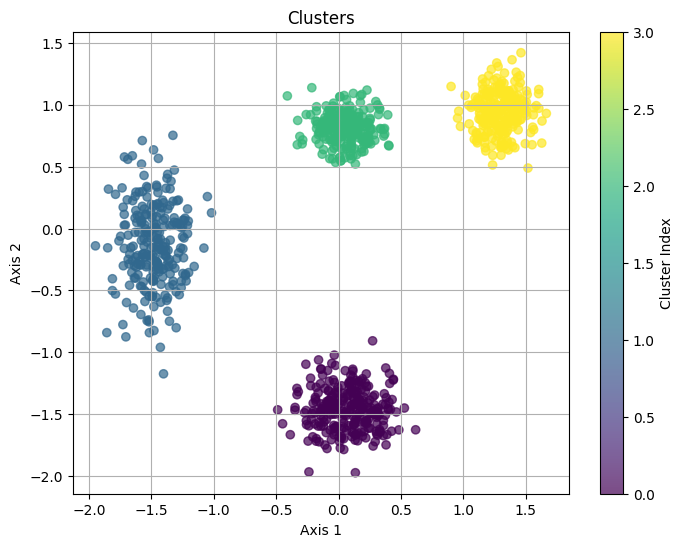

In [21]:
# Generate multimodal data
key = jax.random.PRNGKey(100)
n_samples = 1000
n_features = 2
n_modes = 4  # Number of clusters

random_arr, cluster_assignments = multimodal_random_generator(
    key, shape=(n_samples, n_features), n_modes=n_modes, minval=1, maxval=20
)
random_arr = (random_arr - random_arr.mean(axis=0))/(random_arr.std(axis=0))
# Visualize
plot_features(random_arr, clusters=cluster_assignments)

# Test

In [22]:
import jax
import jax.numpy as jnp
from kmeans import KMeans
from utils import plot_centroid_trajectory

In [23]:
kmeans = KMeans(random_arr, n_clusters=n_modes, max_iter=200, seed=42) 

Epoch 0: distance = 2.9539
Epoch 10: distance = 3.8959
Epoch 20: distance = 3.8959
Epoch 30: distance = 3.8959
Epoch 40: distance = 3.8959
Epoch 50: distance = 3.8959
Epoch 60: distance = 3.8959
Epoch 70: distance = 3.8959
Epoch 80: distance = 3.8959
Epoch 90: distance = 3.8959
Epoch 100: distance = 3.8959
Epoch 110: distance = 3.8959
Epoch 120: distance = 3.8959
Epoch 130: distance = 3.8959
Epoch 140: distance = 3.8959
Epoch 150: distance = 3.8959
Epoch 160: distance = 3.8959
Epoch 170: distance = 3.8959
Epoch 180: distance = 3.8959
Epoch 190: distance = 3.8959


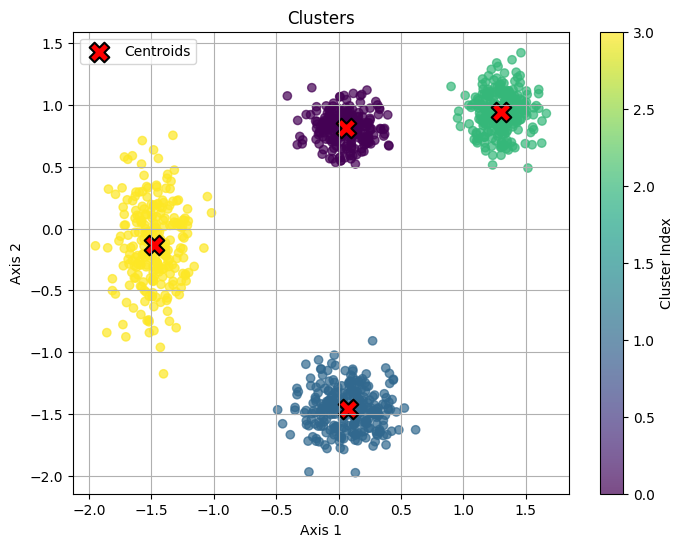

In [24]:
centroids, assignments, distance, centroids_history, assignment_history = kmeans.fit(
    verbose=True, track_history=True
)
plot_features(random_arr, clusters=assignments, centroids=centroids)

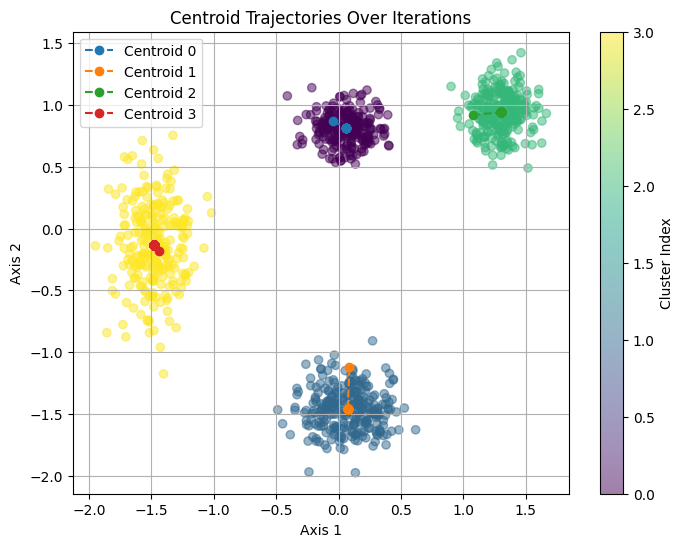

In [26]:
plot_centroid_trajectory(centroids_history=centroids_history, data=random_arr, clusters=assignments)

In [31]:
%%timeit
centroids, assignments, distance = kmeans.fit(
    verbose=False, track_history=False
)


12.7 ms ± 352 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
from sklearn.cluster import KMeans
kmeans_sklearn = KMeans(n_clusters=n_modes, init='random')

In [32]:
%%timeit
kmean_sklearn_y = kmeans_sklearn.fit_transform(random_arr)

8.44 ms ± 299 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
kmean_sklearn_y = kmeans_sklearn.fit_transform(random_arr)
assignments_sklearn = kmean_sklearn_y.argmin(axis=1)
assignments_sklearn.shape

(1000,)

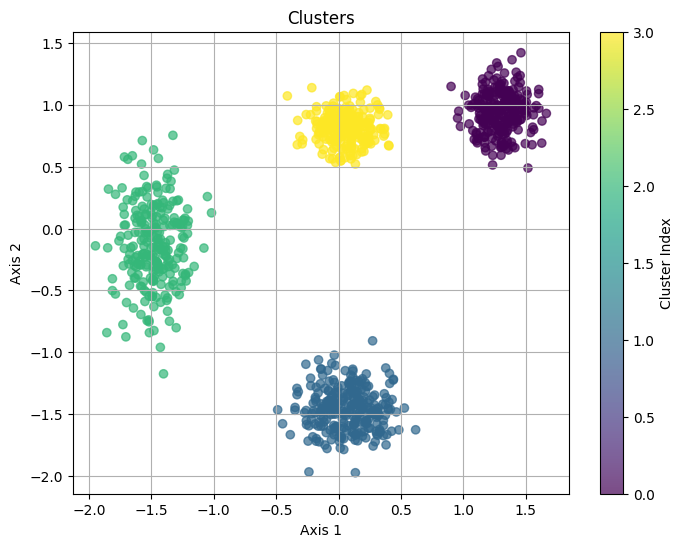

In [34]:
plot_features(random_arr, assignments_sklearn)